In [1]:
import torch
from torch.nn.functional import conv2d
import matplotlib.pyplot as plt

In [2]:
SIZE = 16
FOOD_CHANNEL = 0
FOOD_REWARD = 1
SNAKE_CHANNEL = 1
OPPOSITE_DIRECTION = {
    'up': 'down',
    'down': 'up',
    'left': 'right',
    'right': 'left'
}

In [3]:
worm = torch.zeros((1, 1, SIZE, SIZE))
worm[0, 0, 4, 4] = 1
worm[0, 0, 4, 5] = 2
worm[0, 0, 5, 5] = 3
worm[0, 0, 6, 5] = 4

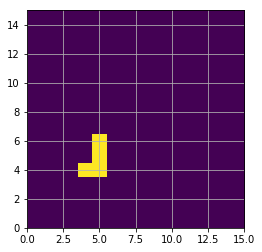

In [4]:
plt.imshow(worm.numpy()[0, 0].clip(0, 1))
plt.xlim((0, SIZE-1))
plt.ylim((0, SIZE-1))
plt.grid()

In [5]:
def step(worm, direction):
    argmax = worm.argmax()
    h = argmax // SIZE
    w = argmax % SIZE
    
    if direction == 'up':
        h += 1
    elif direction == 'down': 
        h -= 1
    elif direction == 'left':
        w -= 1
    elif direction == 'right':
        w += 1
    else:
        raise Exception
    
    worm[0, 0, h, w] += worm.max() + 1
    worm = torch.clamp(worm - 1, 0)
    
    return worm

In [6]:
moves = ['up', 'up', 'right', 'up', 'up', 'left']
worm = torch.zeros((1, 1, SIZE, SIZE))
worm[0, 0, 4, 4] = 1
worm[0, 0, 4, 5] = 2
worm[0, 0, 5, 5] = 3
worm[0, 0, 6, 5] = 4

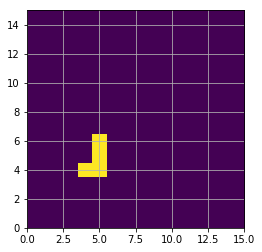

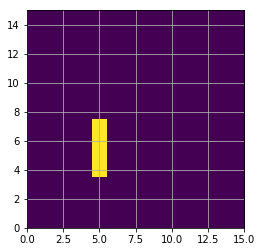

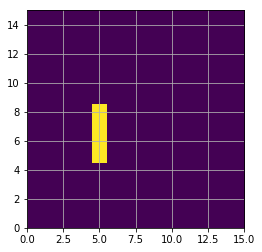

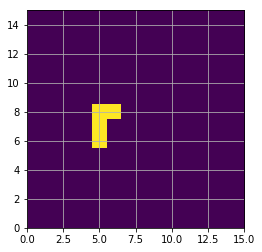

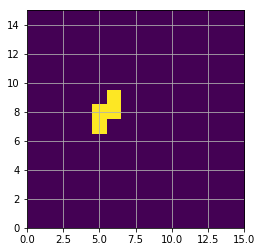

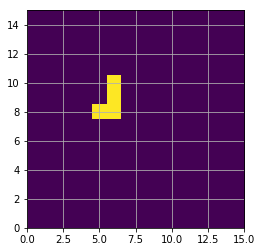

In [7]:
for m in moves:
    plt.imshow(worm.numpy()[0, 0].clip(0, 1))
    plt.xlim((0, SIZE-1))
    plt.ylim((0, SIZE-1))
    plt.grid()
    plt.show()
    worm  = step(worm, m)

### Food

In [8]:
def get_test_world():
    # Channels:
    # 0: Food
    # 1: Snake
    world  = torch.zeros((1, 2, SIZE, SIZE))
    world[0, SNAKE_CHANNEL, 4, 4] = 1
    world[0, SNAKE_CHANNEL, 4, 5] = 2
    world[0, SNAKE_CHANNEL, 5, 5] = 3
    world[0, SNAKE_CHANNEL, 6, 5] = 4

    world[0, FOOD_CHANNEL, 7, 7] = 1
    
    return world

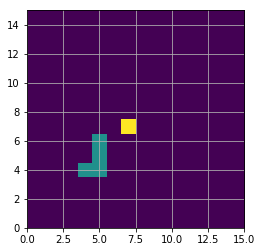

In [9]:
def plot_world(world):
    img = world[0, SNAKE_CHANNEL, :, :].numpy().clip(0, 1)
    img += world[0, FOOD_CHANNEL, :, :].numpy() * 2
    plt.imshow(img)
    plt.xlim((0, SIZE-1))
    plt.ylim((0, SIZE-1))
    plt.grid()
    plt.show()
    
plot_world(get_test_world())

In [10]:
def move(h, w, direction):
    if direction == 'up':
        h_new, w_new = h + 1, w
    elif direction == 'down': 
        h_new, w_new = h - 1, w
    elif direction == 'left':
        h_new, w_new = h, w - 1
    elif direction == 'right':
        h_new, w_new = h, w + 1
    else:
        raise Exception
        
    return h_new, w_new

In [11]:
def step_world(world, direction):
    reward = 0.

    argmax = world[0, SNAKE_CHANNEL].argmax()
    h = argmax // SIZE
    w = argmax % SIZE
    
    h_new, w_new = move(h, w, direction)
        
    # Check that snake is not moving onto itself
    if world[0, SNAKE_CHANNEL, h_new, w_new] == worm.max() - 1:
        # Snake is trying moving "backwards", ignore this command
        # by defaulting to "forwards"
        print('Attempting to move backwards')
        h_new, w_new = move(h_new, w_new, OPPOSITE_DIRECTION[direction])
        h_new, w_new = move(h_new, w_new, OPPOSITE_DIRECTION[direction])
    elif world[0, SNAKE_CHANNEL, h_new, w_new] > 0:
        print('Dead - snake')
        # Dies by hitting itself
        return world, reward, True, {}
        
    # Check for edge of world
    h_boundary = (h_new == 0) or (h_new == (SIZE - 1))
    w_boundary = (w_new == 0) or (w_new == (SIZE - 1))
    if h_boundary or w_boundary:
        print('Dead - boundary')
        # Dies at edge of world
        done = True
    else:
        done = False
    
    # Move head of snake to new position
    world[0, SNAKE_CHANNEL, h_new, w_new] += worm.max() + 1
    
    # Check for food at head position
    if world[0, FOOD_CHANNEL][h_new, w_new] > 0:
        # Remove food
        world[0, FOOD_CHANNEL][h_new, w_new] = 0
        # Create new food at a random location
        world[0, FOOD_CHANNEL][10, 10] = 1
        # Add reward
        reward += FOOD_REWARD
    else:
        # If no food found, delete tail of snake
        world[0, SNAKE_CHANNEL] = torch.clamp(world[0, SNAKE_CHANNEL] - 1, 0)
    
    return world, reward, done, {}

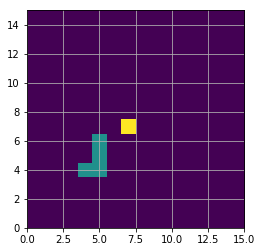

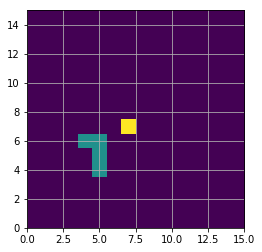

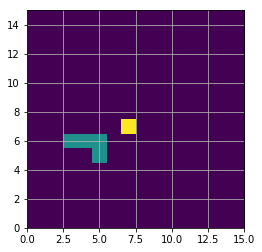

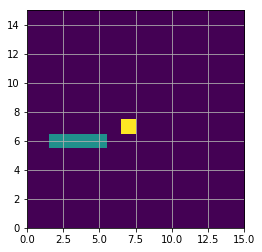

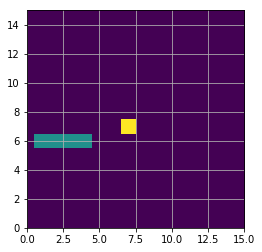

Dead - boundary


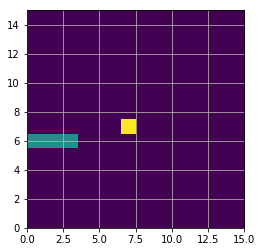

In [12]:
# Hits boundary test
moves = ['left'] * 10

test_world = get_test_world()
for m in moves:
    plot_world(test_world)
    test_world, reward, done, info = step_world(test_world, m)
    
    if done:
        break
    
plot_world(test_world)

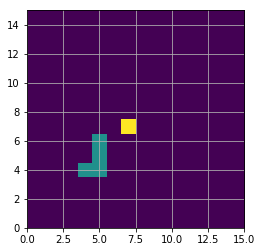

Attempting to move backwards


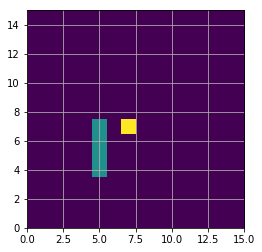

Attempting to move backwards


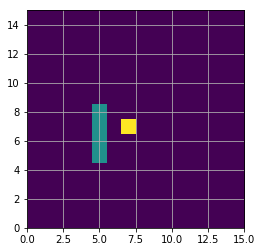

Attempting to move backwards


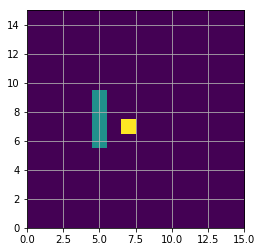

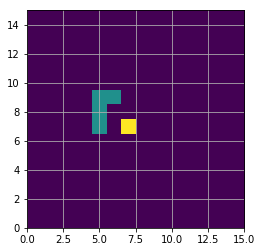

In [13]:
# Move back on self test
moves = ['down', 'down', 'down', 'right']

test_world = get_test_world()
for m in moves:
    plot_world(test_world)
    test_world, reward, done, info = step_world(test_world, m)
    
plot_world(test_world)

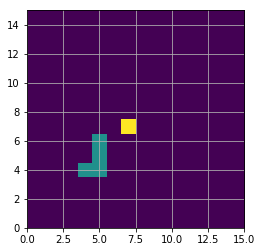

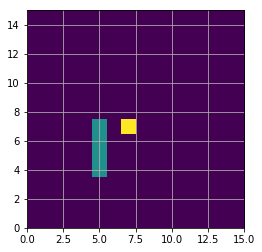

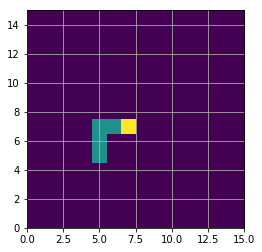

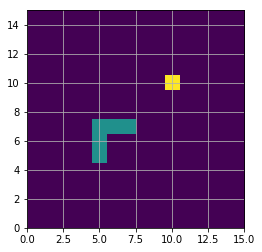

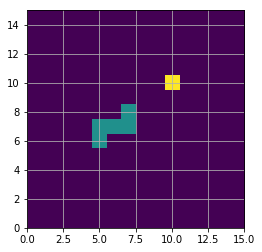

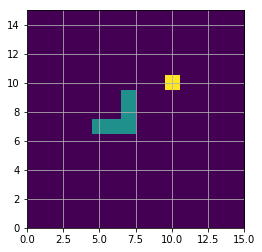

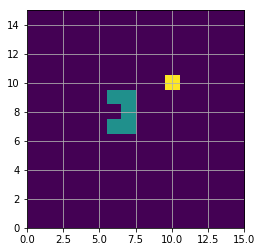

In [14]:
# Food eating test
moves = ['up', 'right', 'right', 'up', 'up', 'left']

test_world = get_test_world()
for m in moves:
    plot_world(test_world)
    test_world, reward, done, info = step_world(test_world, m)

plot_world(test_world)

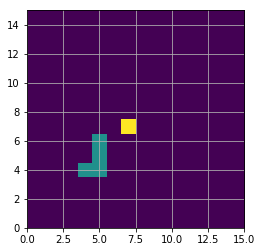

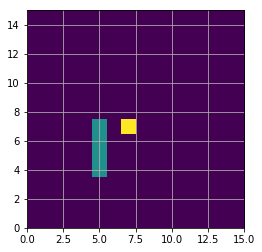

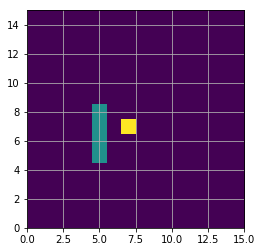

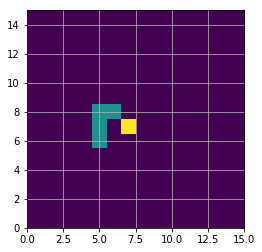

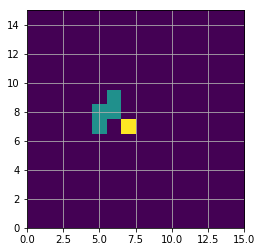

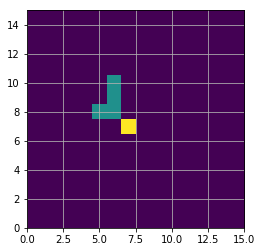

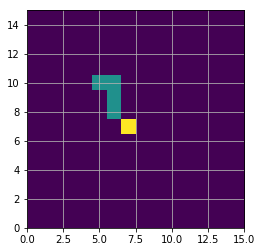

In [15]:
# Generic test
moves = ['up', 'up', 'right', 'up', 'up', 'left']

test_world = get_test_world()
for m in moves:
    plot_world(test_world)
    test_world, reward, done, info = step_world(test_world, m)
    
plot_world(test_world)